# Regressión Logistica Diabetes

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('diabetes Logistic Regression.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
import seaborn as sns

<Axes: >

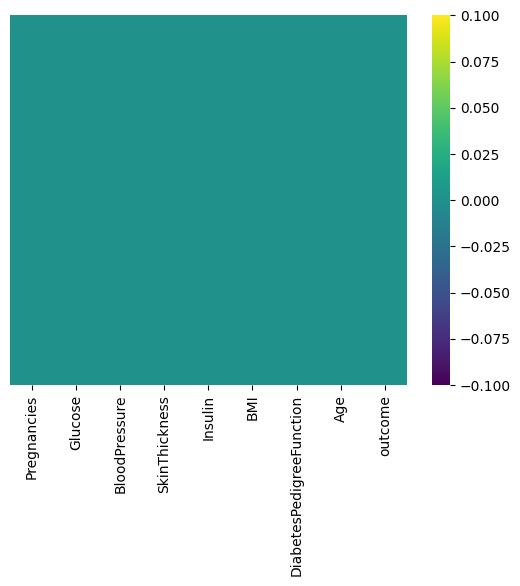

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [9]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
outcome,0


In [10]:
from sklearn.preprocessing import StandardScaler

In [12]:
x = df.drop('outcome',axis=1)
y = df['outcome']

In [13]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [14]:
y

,outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [16]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [17]:
reg = LogisticRegression()
reg = reg.fit(x_train_scaled,y_train)

In [18]:
y_pred = reg.predict(x_test_scaled)

In [20]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7878787878787878

In [25]:
from sklearn.model_selection import cross_val_score

# 🔹 Validación cruzada con 5 particiones (k=5)
scores = cross_val_score(reg,x_train_scaled, y_train, cv=5, scoring="accuracy")

# 🔹 Resultados
print("🔹 Precisión en cada fold:", scores)
print("🔹 Precisión promedio:", scores.mean())


🔹 Precisión en cada fold: [0.75925926 0.74074074 0.80373832 0.77570093 0.75700935]
🔹 Precisión promedio: 0.7672897196261681


In [26]:
from sklearn.model_selection import GridSearchCV

# 🔹 Definir el espacio de búsqueda de hiperparámetros
parametros = {
    "C": [0.01, 0.1, 1, 10, 100],  # Controla la regularización
    "penalty": ["l1", "l2"],  # Tipo de regularización
    "solver": ["liblinear"]  # Necesario para L1
}

# 🔹 Configurar GridSearchCV
grid_search = GridSearchCV(LogisticRegression(), parametros, cv=5, scoring="accuracy", n_jobs=-1)

# 🔹 Entrenar la búsqueda
grid_search.fit(x_train_scaled, y_train)

# 🔹 Ver mejores hiperparámetros
print("🔹 Mejor combinación de hiperparámetros:", grid_search.best_params_)
print("🔹 Mejor precisión obtenida:", grid_search.best_score_)

# 🔹 Entrenar el modelo con los mejores hiperparámetros
modelo_mejorado = grid_search.best_estimator_


🔹 Mejor combinación de hiperparámetros: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
🔹 Mejor precisión obtenida: 0.7710280373831775


In [28]:
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(x_train_scaled,  y_train)
y_pred_rf = modelo_rf.predict(x_test_scaled)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"🔹 Precisión con Random Forest: {accuracy_rf:.2f}")


🔹 Precisión con Random Forest: 0.76


In [29]:
from sklearn.svm import SVC

modelo_svm = SVC(kernel="rbf", C=1, gamma="scale")
modelo_svm.fit(x_train_scaled, y_train)
y_pred_svm = modelo_svm.predict(x_test_scaled)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"🔹 Precisión con SVM: {accuracy_svm:.2f}")


🔹 Precisión con SVM: 0.78


In [31]:
columnas = df.columns
columnas


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'outcome'],
      dtype='object')

In [33]:
import matplotlib.pyplot as plt

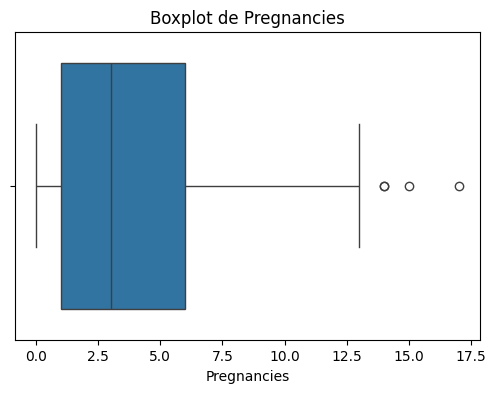

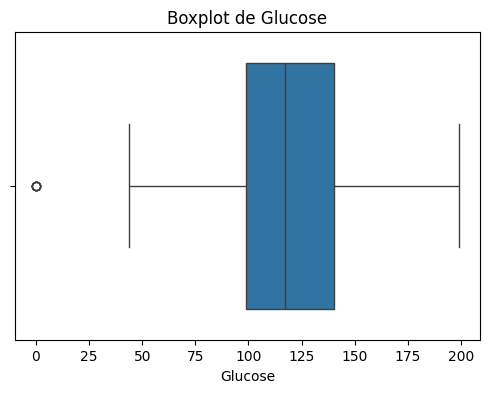

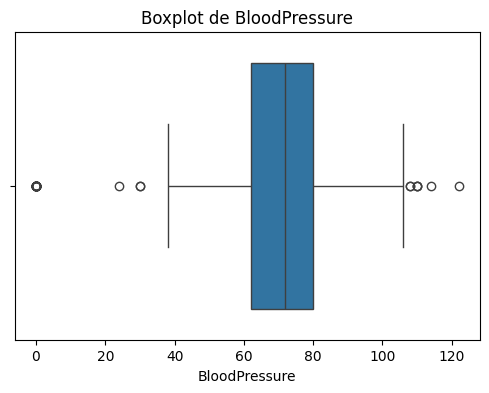

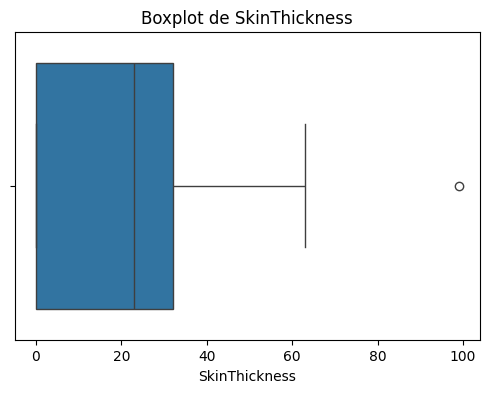

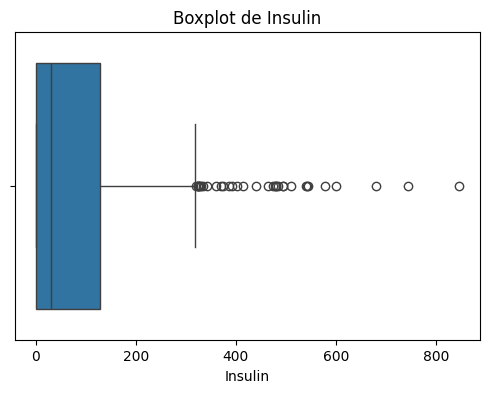

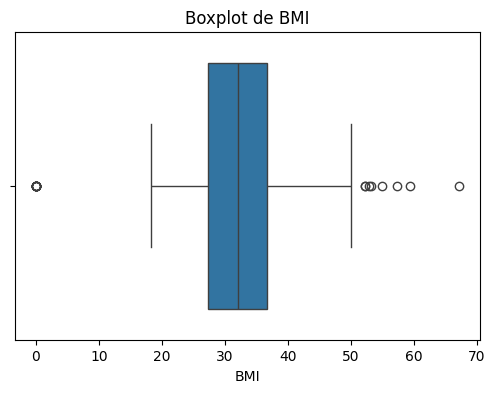

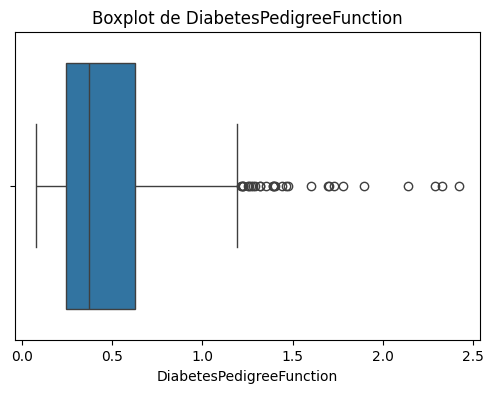

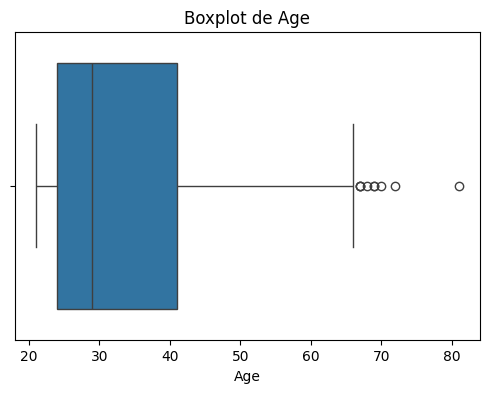

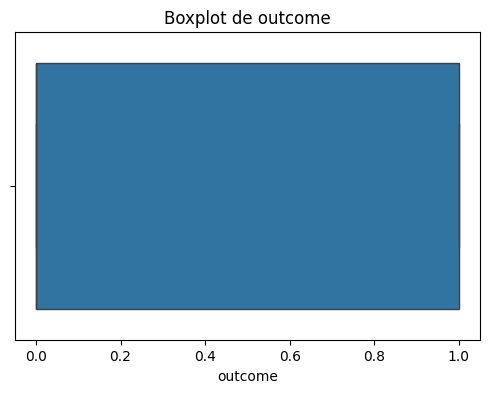

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in columnas:
    plt.figure(figsize=(6, 4))  # Opcional: Define el tamaño de la figura
    sns.boxplot(x=df[i])  # Especifica el DataFrame y la columna
    plt.title(f"Boxplot de {i}")  # Título dinámico para cada gráfico
    plt.show()


In [38]:
coeficientes = reg.coef_[0]
coeficientes

array([ 0.38054487,  1.05503522, -0.23978264, -0.03056287, -0.08030387,
        0.65598322,  0.33115598,  0.23161256])

In [44]:
# Crear un DataFrame con los coeficientes y las variables correspondientes
# Si no quieres convertir a DataFrame, puedes usar las columnas originales de X_train
coef_df = pd.DataFrame({
    'Variable': x_train.columns,
    'Coeficiente': coeficientes
})

coef_df['Abs_Coef'] = coef_df['Coeficiente'].abs()
coef_df = coef_df.sort_values(by='Abs_Coef', ascending=False)

print(coef_df[['Variable', 'Coeficiente']])


                   Variable  Coeficiente
1                   Glucose     1.055035
5                       BMI     0.655983
0               Pregnancies     0.380545
6  DiabetesPedigreeFunction     0.331156
2             BloodPressure    -0.239783
7                       Age     0.231613
4                   Insulin    -0.080304
3             SkinThickness    -0.030563


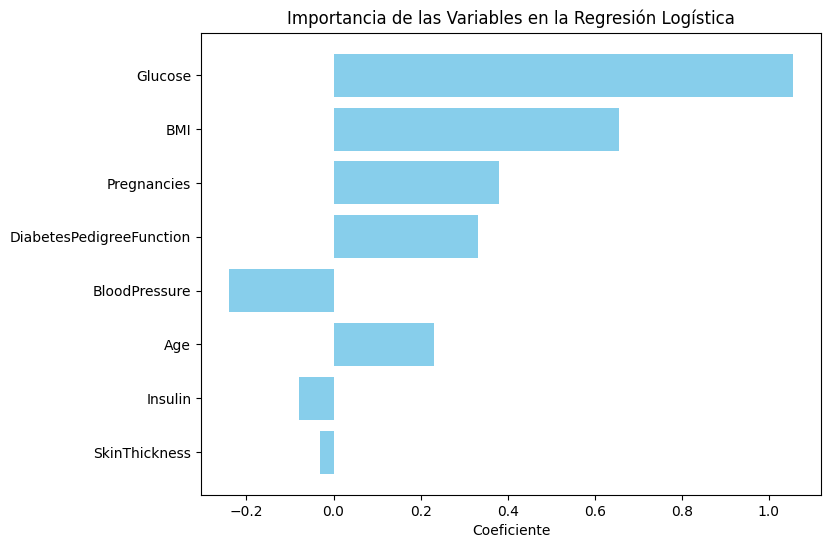

In [45]:
import matplotlib.pyplot as plt

# Ordenar el DataFrame por el valor absoluto del coeficiente
coef_df = coef_df.sort_values(by='Abs_Coef', ascending=True)

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
plt.barh(coef_df['Variable'], coef_df['Coeficiente'], color='skyblue')
plt.xlabel('Coeficiente')
plt.title('Importancia de las Variables en la Regresión Logística')
plt.show()


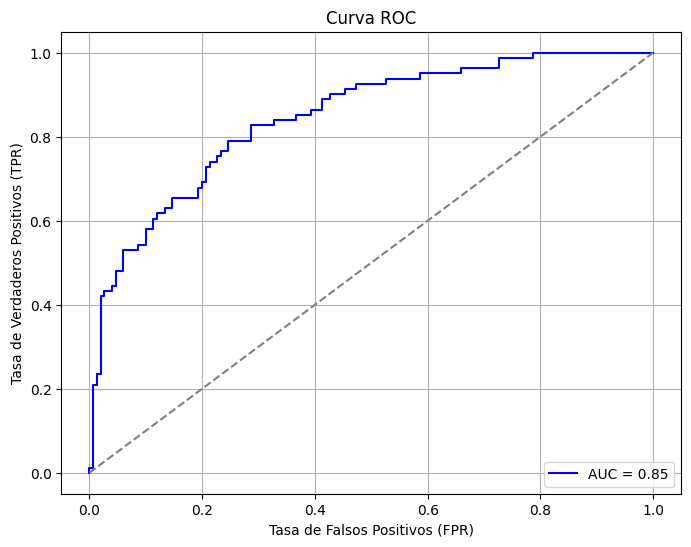

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Obtén las probabilidades predichas para la clase positiva (1)
y_prob = reg.predict_proba(x_test_scaled)[:, 1]

# Calcula las tasas de FPR (Falsos positivos) y TPR (Verdaderos positivos)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcula el AUC (Área bajo la curva)
auc = roc_auc_score(y_test, y_prob)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea de referencia
plt.title('Curva ROC')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


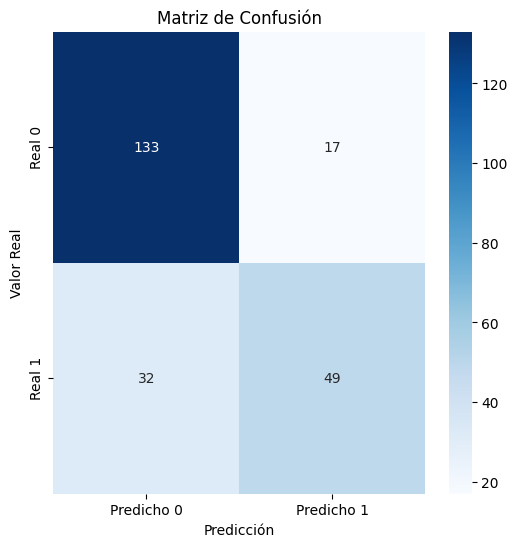

              precision    recall  f1-score   support

           0       0.81      0.89      0.84       150
           1       0.74      0.60      0.67        81

    accuracy                           0.79       231
   macro avg       0.77      0.75      0.76       231
weighted avg       0.78      0.79      0.78       231



In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Obtén las predicciones para el conjunto de prueba
y_pred = reg.predict(x_test_scaled)

# Genera la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualiza la matriz de confusión
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicho 0', 'Predicho 1'], yticklabels=['Real 0', 'Real 1'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

# Opcional: Puedes calcular también otras métricas como precisión, recall, y F1-Score
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


[1 1 0 1 0 1 1 0 0 1]


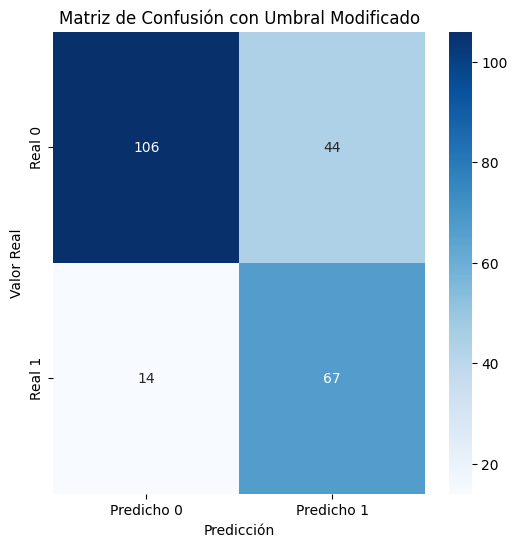

In [51]:
import numpy as np

# Obtén las probabilidades predichas para la clase positiva (1)
y_prob = reg.predict_proba(x_test_scaled)[:, 1]

# Define el nuevo umbral
nuevo_umbral = 0.3  # Puedes cambiar este valor según lo que desees

# Clasifica de acuerdo con el nuevo umbral
y_pred_nuevo = (y_prob >= nuevo_umbral).astype(int)

# Verifica las primeras predicciones
print(y_pred_nuevo[:10])

# Luego, puedes evaluar el rendimiento con el nuevo umbral utilizando métricas como la matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_nuevo)

# Visualizar la matriz de confusión
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicho 0', 'Predicho 1'], yticklabels=['Real 0', 'Real 1'])
plt.title('Matriz de Confusión con Umbral Modificado')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()


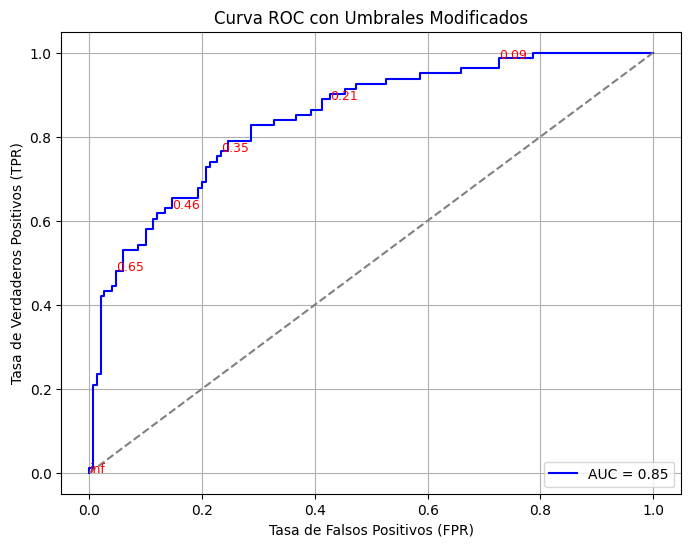

In [55]:
# Obtén las probabilidades predichas para la clase positiva (1)
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Obtén las probabilidades predichas para la clase positiva (1)
y_prob = reg.predict_proba(x_test_scaled)[:, 1]

# Calcula la curva ROC para diferentes umbrales
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcula el AUC (Área bajo la curva)
auc = roc_auc_score(y_test, y_prob)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea de referencia

# Añadir los umbrales como marcas en la curva ROC
for i in range(0, len(thresholds), int(len(thresholds)/5)):  # Muestra cada 5 umbrales para no sobrecargar el gráfico
    plt.text(fpr[i], tpr[i], f'{thresholds[i]:.2f}', fontsize=9, color='red')

# Configurar el gráfico
plt.title('Curva ROC con Umbrales Modificados')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [56]:
from sklearn.metrics import f1_score, accuracy_score
import numpy as np

# Obtén las probabilidades predichas para la clase positiva (1)
y_prob = reg.predict_proba(x_test_scaled)[:, 1]

# Inicializa una lista para almacenar el rendimiento para cada umbral
umbral_f1_scores = []

# Itera sobre diferentes valores de umbral
for umbral in np.arange(0.0, 1.1, 0.1):  # Cambia el paso para probar más umbrales
    # Clasifica según el umbral
    y_pred = (y_prob >= umbral).astype(int)

    # Calcula el F1-score para este umbral
    f1 = f1_score(y_test, y_pred)

    # Almacena el rendimiento
    umbral_f1_scores.append((umbral, f1))

# Encuentra el umbral con el mejor F1-score
mejor_umbral, mejor_f1_score = max(umbral_f1_scores, key=lambda x: x[1])

print(f"El mejor umbral es {mejor_umbral:.2f} con un F1-score de {mejor_f1_score:.4f}")

# Si prefieres accuracy, puedes hacer algo similar:
umbral_accuracy_scores = []

for umbral in np.arange(0.0, 1.1, 0.1):
    y_pred = (y_prob >= umbral).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    umbral_accuracy_scores.append((umbral, accuracy))

mejor_umbral_accuracy, mejor_accuracy = max(umbral_accuracy_scores, key=lambda x: x[1])

print(f"El mejor umbral según Accuracy es {mejor_umbral_accuracy:.2f} con un Accuracy de {mejor_accuracy:.4f}")


El mejor umbral es 0.30 con un F1-score de 0.6979
El mejor umbral según Accuracy es 0.50 con un Accuracy de 0.7879


In [57]:
# Muestra los coeficientes del modelo
coeficientes = pd.DataFrame(reg.coef_.T, index=x_train.columns, columns=['Coeficiente'])
print(coeficientes)


                          Coeficiente
Pregnancies                  0.380545
Glucose                      1.055035
BloodPressure               -0.239783
SkinThickness               -0.030563
Insulin                     -0.080304
BMI                          0.655983
DiabetesPedigreeFunction     0.331156
Age                          0.231613


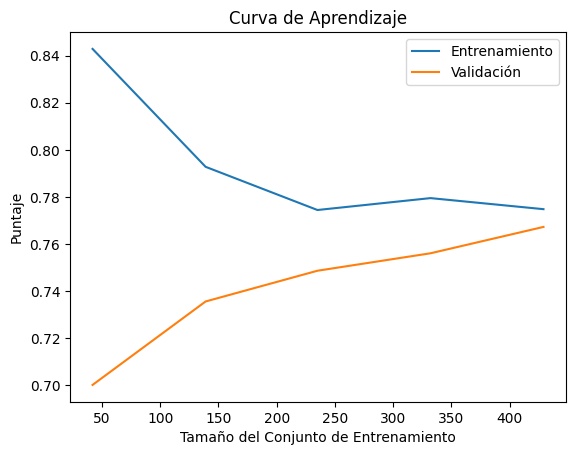

In [59]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Calcula las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(reg, x_train_scaled, y_train, cv=5)

# Promedia los puntajes de validación y entrenamiento
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

# Graficar la curva de aprendizaje
plt.plot(train_sizes, train_mean, label='Entrenamiento')
plt.plot(train_sizes, test_mean, label='Validación')
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('Puntaje')
plt.title('Curva de Aprendizaje')
plt.legend()
plt.show()


In [60]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Ejemplo de nuevo dato
nuevo_dato = {
    'Pregnancies': 1,
    'Glucose': 120,
    'BloodPressure': 70,
    'SkinThickness': 35,
    'Insulin': 0,
    'BMI': 25.5,
    'DiabetesPedigreeFunction': 0.5,
    'Age': 30
}

# Convertirlo a un DataFrame para que coincida con el formato de entrenamiento
nuevo_dato_df = pd.DataFrame([nuevo_dato])

# Asegúrate de aplicar el mismo preprocesamiento que en los datos de entrenamiento
# Ejemplo: Escalado
scaler = StandardScaler()  # Usamos el mismo escalador que usaste al entrenar
nuevo_dato_scaled = scaler.fit_transform(nuevo_dato_df)  # Escalar el nuevo dato


In [63]:
# Realizar la predicción
y_pred = reg.predict(nuevo_dato_scaled)

# Si prefieres obtener las probabilidades
y_prob = reg.predict_proba(nuevo_dato_scaled)

print(f'Predicción de clase: {y_pred}')
print(f'Probabilidades para cada clase: {y_prob}')


Predicción de clase: [0]
Probabilidades para cada clase: [[0.70133433 0.29866567]]
